In [3]:
#read and visualize spine only mesh 
import pyvista as pv 

mesh = pv.read("test1.vtu") 
mesh


UnstructuredGrid (0x2d2994b8d08)
  N Cells:	10427217
  N Points:	4219445
  X Bounds:	1.846e+04, 2.028e+05
  Y Bounds:	1.470e+03, 1.203e+05
  Z Bounds:	-1.501e+02, 2.980e+04
  N Arrays:	2

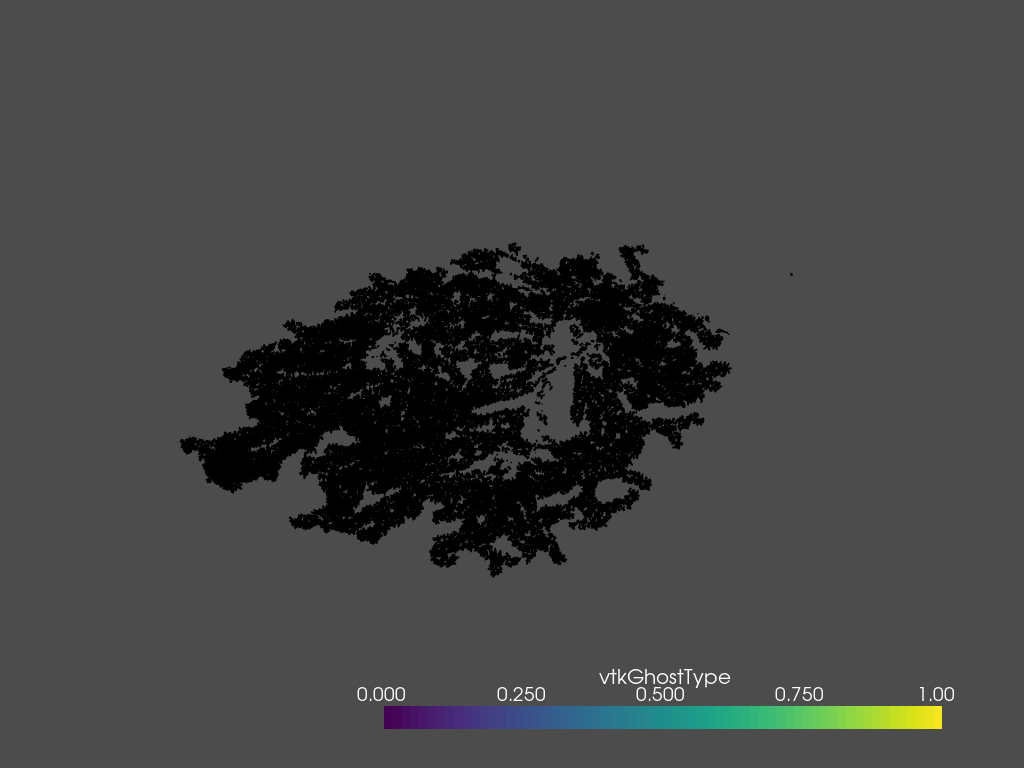

In [4]:
mesh.plot(show_edges=True)

In [5]:
#split mesh to individual spines
spines=mesh.split_bodies() 

In [8]:
#check the number of spines
spines.n_blocks


24331

In [10]:
# check data format of individual spine
spines[1]

UnstructuredGrid (0x2d292807ee8)
  N Cells:	334
  N Points:	133
  X Bounds:	7.841e+04, 7.946e+04
  Y Bounds:	4.288e+04, 4.360e+04
  Z Bounds:	2.286e+04, 2.360e+04
  N Arrays:	2

In [16]:
#save file 
spines.save("spines.vtm")

ValueError: Invalid file extension for this data type. Must be one of: dict_keys(['.vtm', '.vtmb'])

In [1]:
#read file from saved file
import pyvista as pv
new=pv.read("spines.vtm")

In [4]:
#saved dataset is identical to original one, each spine can be accessed

new.n_blocks

24331

In [5]:
#Visualising individual spine
spine=new[5]
spine


UnstructuredGrid (0x21dbec895e8)
  N Cells:	269
  N Points:	110
  X Bounds:	7.780e+04, 7.861e+04
  Y Bounds:	4.586e+04, 4.673e+04
  Z Bounds:	2.844e+04, 2.905e+04
  N Arrays:	2

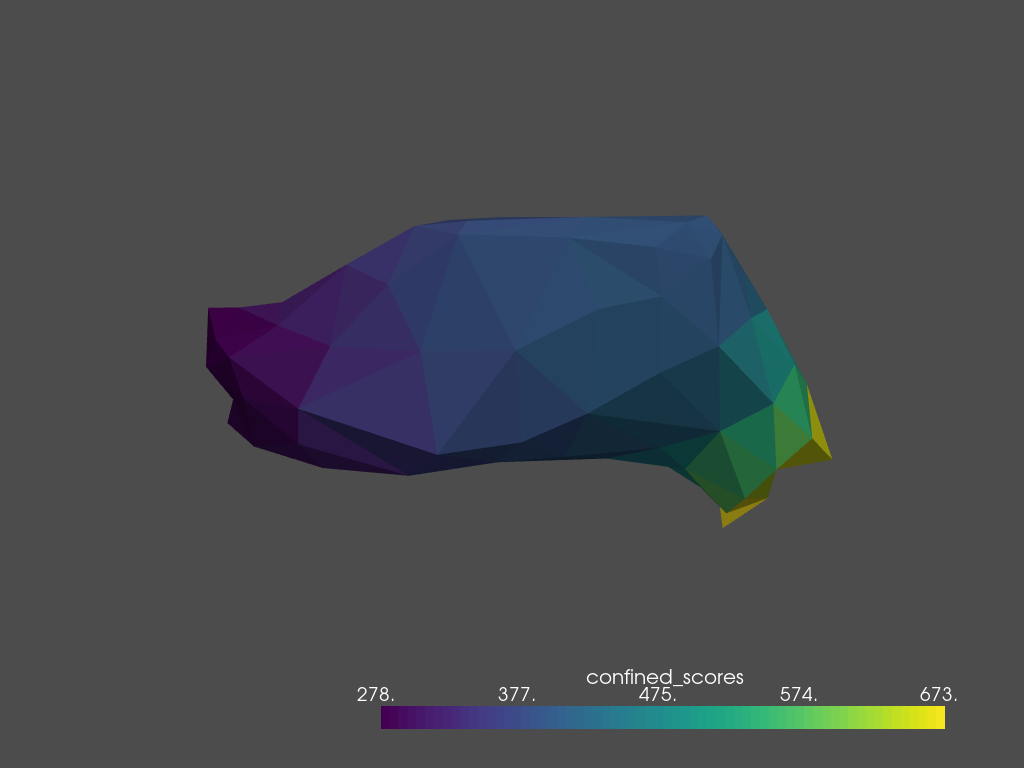

In [6]:
pl = pv.Plotter()
pl.add_mesh(spine, scalars='confined_scores')
pl.show()

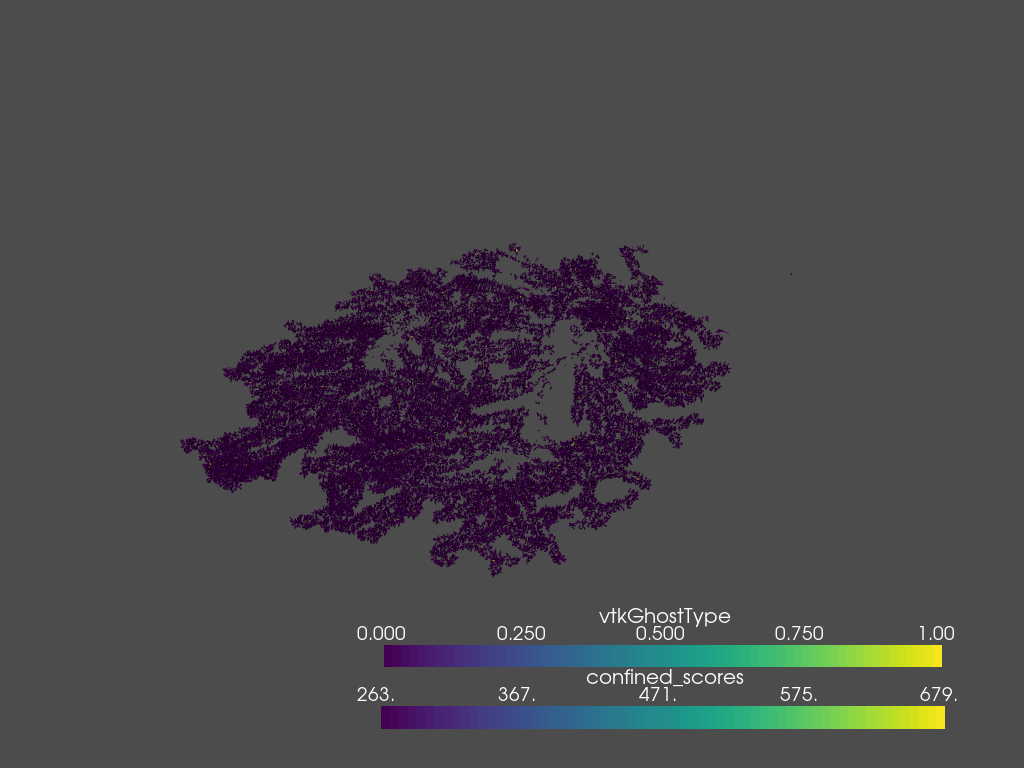

In [21]:
new.plot()

78.09252738952637


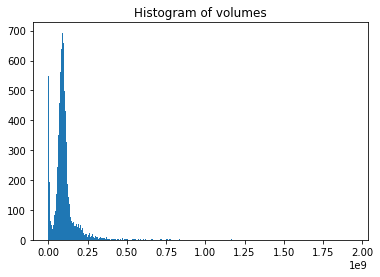

In [5]:
#Spine volume distribution
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool
import time

volumes=np.zeros(new.n_blocks)  
index=range(new.n_blocks)
start=time.time()
def addvolume(i):
    block=new[i]
    volumes[i]=block.volume

if __name__ == '__main__':
    pool = Pool()
    pool.map(addvolume, index)
    pool.close()
    pool.join()

#bigs=[]
#for i in range(new.n_blocks):
#    block=new[i]
#    volumes[i]= block.volume
#    if block.volume>(0.25*10**9):
#        bigs.append(i)
    
print(time.time()-start)

plt.hist(volumes, bins=1000)  # arguments are passed to np.histogram
plt.title("Histogram of volumes")
plt.show()




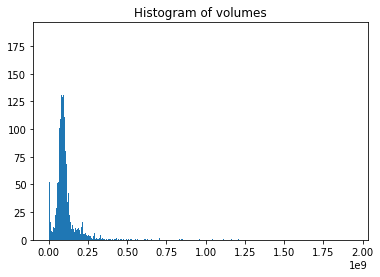

In [16]:
plt.hist(volumes, bins=5000)  # arguments are passed to np.histogram
plt.title("Histogram of volumes")
plt.show()

34.52239489555359


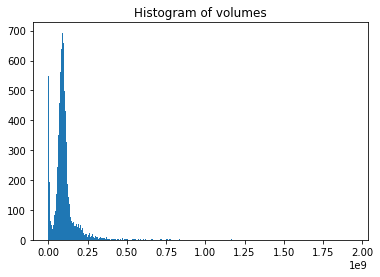

In [6]:
volumes=np.zeros(new.n_blocks)  
#index=range(new.n_blocks)
start=time.time()
def addvolume(i):
    block=new[i]
    volumes[i]=block.volume

#if __name__ == '__main__':
#    pool = Pool()
#    pool.map(addvolume, index)
#    pool.close()
#    pool.join()

#bigs=[]
for i in range(new.n_blocks):
    block=new[i]
    volumes[i]= block.volume
#    if block.volume>(0.25*10**9):
#        bigs.append(i)
    
print(time.time()-start)

plt.hist(volumes, bins=1000)  # arguments are passed to np.histogram
plt.title("Histogram of volumes")
plt.show()

In [27]:
#There is no null blocks and empty meshes
new.n_blocks

24331

In [13]:
print(min(volumes), max(volumes))

1262.313588032499 1938663508.7787483


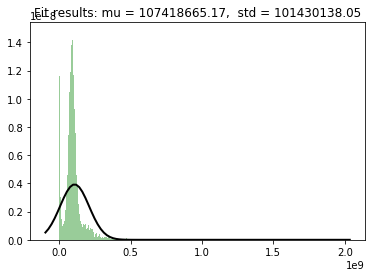

In [25]:
from scipy.stats import norm
# Fit a normal distribution to the data:
mu, std = norm.fit(volumes)

# Plot the histogram.
plt.hist(volumes, bins=1000, density=True, alpha=0.4, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

NameError: name 'np' is not defined

In [7]:
len(bigs)

1061

In [2]:
print(n)

[0 1 2 3]


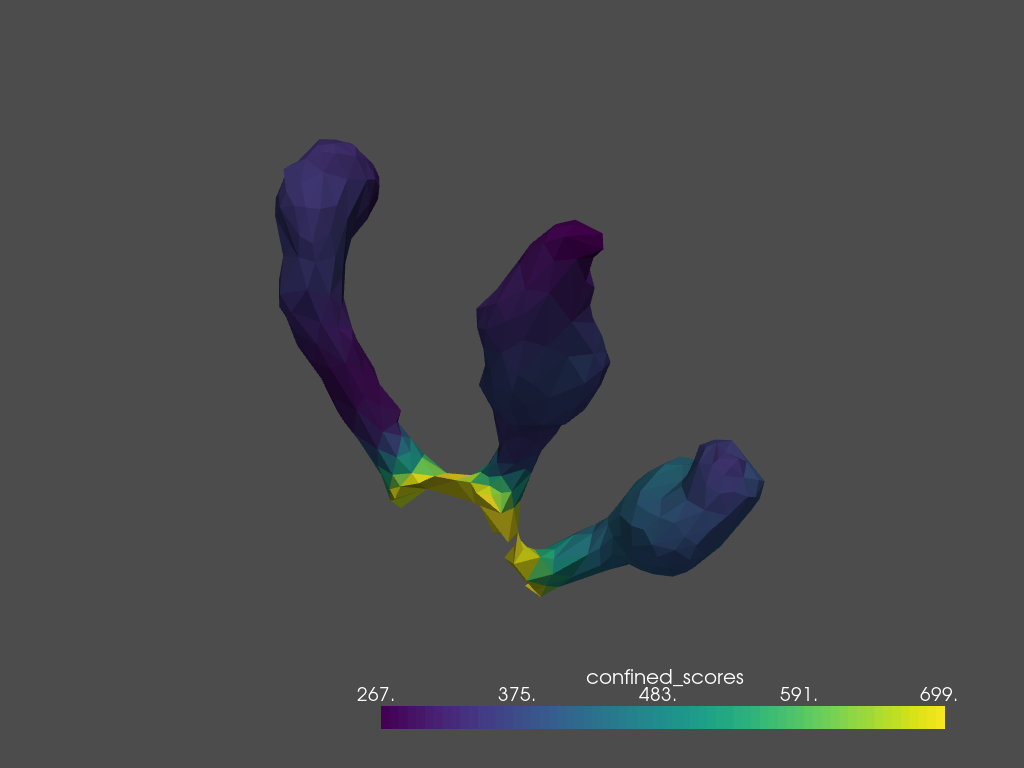

In [18]:
spine=new[bigs[100]]
pl = pv.Plotter()
pl.add_mesh(spine, scalars='confined_scores')
pl.show()